# Investigating Heart Disease Classification Dataset (Performing EDA and Machine Learning techniques)

In [180]:
# Importing necessary machine learning libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay 

In [181]:
df=pd.read_csv("heart-disease.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


Exploratory Data Analysis (EDA)

In [182]:
df.shape

(303, 15)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [184]:
df.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [185]:
del df['Unnamed: 0']

In [186]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [187]:
df["target"].value_counts()

yes    165
no     138
Name: target, dtype: int64

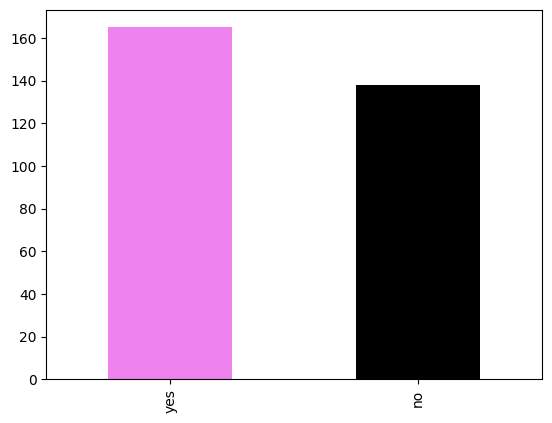

In [188]:
df["target"].value_counts().plot(kind="bar", color=["violet", "black"]);

In [189]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [190]:
df.dropna(subset=['trestbps','chol','thalach'], inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes


In [191]:
df.shape

(293, 14)

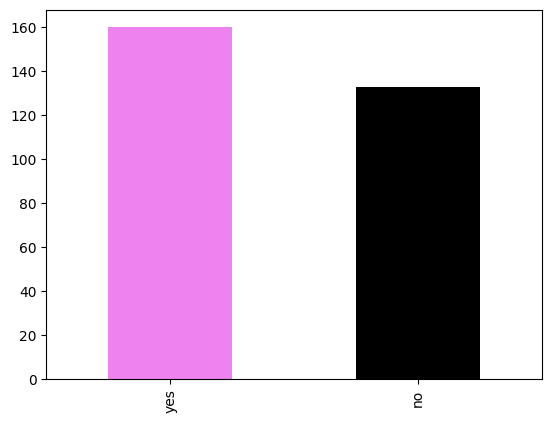

In [192]:
df["target"].value_counts().plot(kind="bar", color=["violet", "black"]);

In [193]:
df["target"].value_counts()

yes    160
no     133
Name: target, dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    object 
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    int64  
 6   restecg   293 non-null    int64  
 7   thalach   293 non-null    float64
 8   exang     293 non-null    int64  
 9   oldpeak   293 non-null    float64
 10  slope     293 non-null    int64  
 11  ca        293 non-null    int64  
 12  thal      293 non-null    int64  
 13  target    293 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 34.3+ KB


In [195]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The rows having missing values are removed and no missing values are present in the dataframe


In [196]:
#Exploring the relation of sex with heart disease and figuring out related patterns
df['sex'].value_counts()

male      202
female     91
Name: sex, dtype: int64

Finding Patterns 

In [197]:
cross_tab = pd.crosstab(df['target'], df['sex'])

In [198]:
cross_tab

sex,female,male
target,,
no,23,110
yes,68,92


The corsstab results shows that female sex is more prone to heart disease as compared to males.

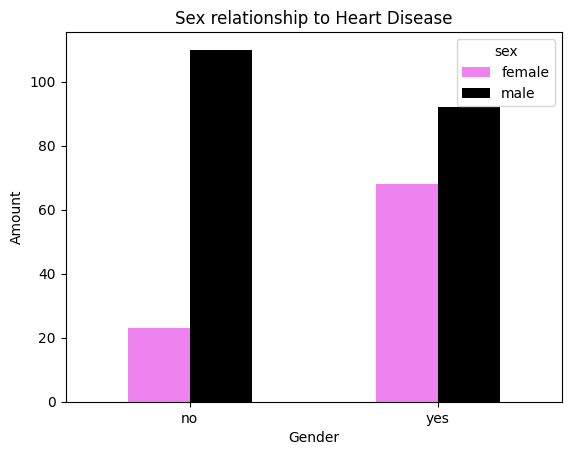

In [199]:
cross_tab.plot(kind="bar", color=["violet","black"]);
plt.title("Sex relationship to Heart Disease")
plt.xlabel("Gender")
plt.ylabel("Amount")

plt.xticks(rotation=0);
plt.show()

The barplot above shows that female have high chances of developing heart disease. It can be seen that although males have higher numbers when studying heart disease but the ratio is larger in case of females.


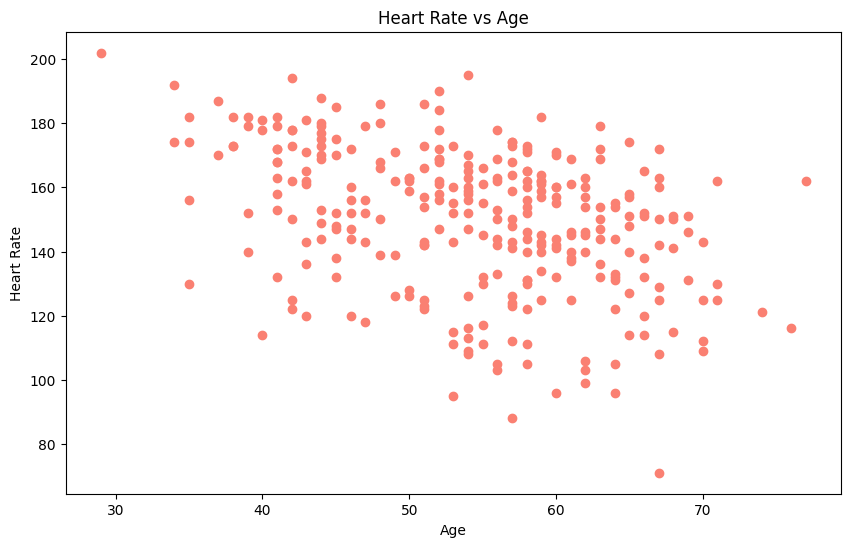

In [200]:
# Checking age vs heart disease
plt.figure(figsize=(10,6))
plt.scatter(df.age,
           df.thalach,
           c='salmon')
plt.title("Heart Rate vs Age")
plt.xlabel("Age")
plt.ylabel("Heart Rate");


The results show that the people having higher age has low heart rate

In [201]:
pd.crosstab(df.cp,df.target)

target,no,yes
cp,,
0,101,37
1,9,41
2,16,66
3,7,16


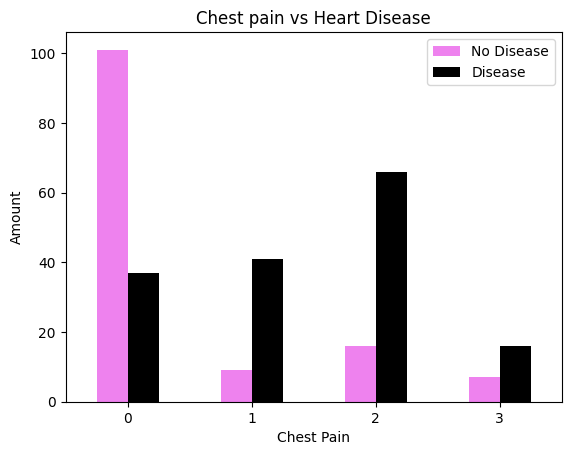

In [202]:

cp = pd.crosstab(df.cp,df.target)
cp.plot(kind="bar", color=["violet","black"])
plt.title("Chest pain vs Heart Disease")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])

plt.xticks(rotation=0);

In [203]:
df.corr(method='pearson', numeric_only=True)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.070586,0.276586,0.216155,0.127349,-0.119509,-0.396884,0.095919,0.211278,-0.167542,0.280493,0.067060
cp,-0.070586,1.000000,0.051210,-0.091003,0.097889,0.045198,0.302782,-0.391609,-0.153591,0.122779,-0.182492,-0.171826
trestbps,0.276586,0.051210,1.000000,0.135529,0.168406,-0.102731,-0.028102,0.072459,0.193254,-0.115657,0.096166,0.073411
chol,0.216155,-0.091003,0.135529,1.000000,0.026193,-0.166307,-0.038738,0.071904,0.066434,-0.026953,0.089595,0.106809
fbs,0.127349,0.097889,0.168406,0.026193,1.000000,-0.078938,0.001339,0.036164,0.009607,-0.060520,0.118146,-0.012527
restecg,-0.119509,0.045198,-0.102731,-0.166307,-0.078938,1.000000,0.038211,-0.073327,-0.051767,0.087550,-0.069496,-0.018690
thalach,-0.396884,0.302782,-0.028102,-0.038738,0.001339,0.038211,1.000000,-0.395491,-0.347278,0.379258,-0.207472,-0.099342
exang,0.095919,-0.391609,0.072459,0.071904,0.036164,-0.073327,-0.395491,1.000000,0.286938,-0.259066,0.121005,0.199949
oldpeak,0.211278,-0.153591,0.193254,0.066434,0.009607,-0.051767,-0.347278,0.286938,1.000000,-0.572282,0.225590,0.206558
slope,-0.167542,0.122779,-0.115657,-0.026953,-0.060520,0.087550,0.379258,-0.259066,-0.572282,1.000000,-0.075180,-0.098280


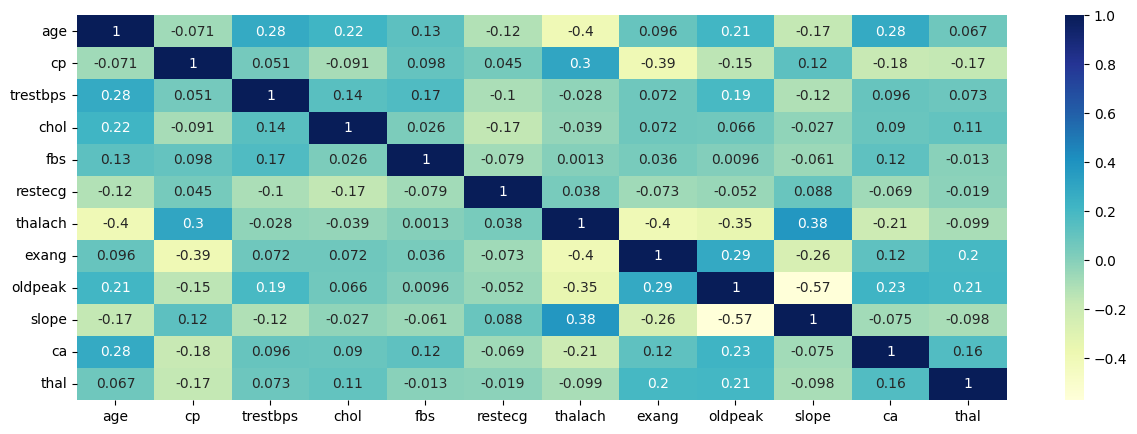

In [204]:
matrix=df.corr(method='pearson', numeric_only=True)

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(matrix, annot=True,cmap="YlGnBu")
plt.show()


The heatmap reflects on the correlation among the features present in the dataframe. 1 value can be regarded as the reference with the maximum correlation. The postive values shows the positive correlation and vice versa.

In [205]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes


In [206]:
# for inlcuding the features having dtypes as objects such as target and sex for better understanding of correlation
df_numerical = df.copy()
for col in df_numerical.columns:
    if df_numerical[col].dtype=='object':
        df_numerical[col]=df_numerical[col].astype('category')
        df_numerical[col]=df_numerical[col].cat.codes
df_numerical.head()
        

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


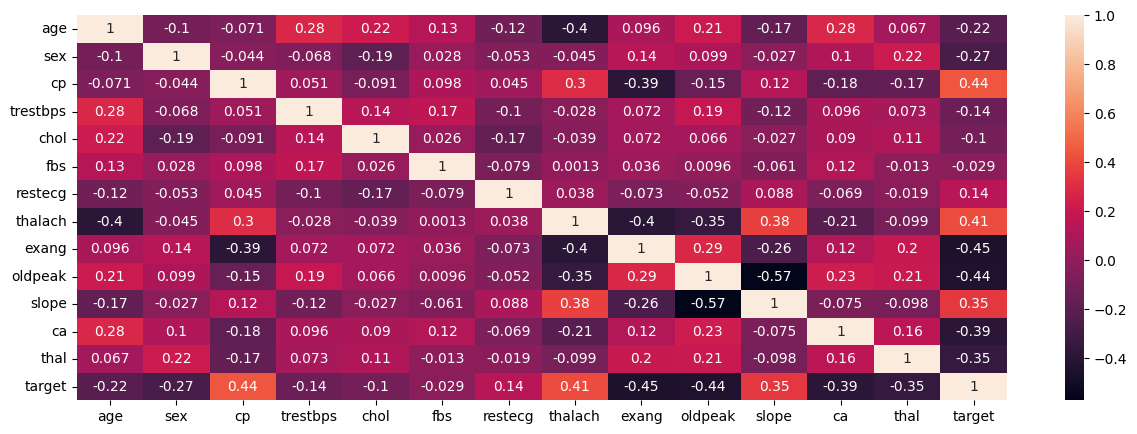

In [207]:
cor_matrix = df_numerical.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(cor_matrix, annot=True)

plt.show()

In [208]:
x = df_numerical.drop("target", axis=1)
y= df_numerical["target"]

In [209]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3


In [210]:
y

0      1
1      1
2      1
3      1
5      1
      ..
296    0
298    0
299    0
300    0
302    0
Name: target, Length: 293, dtype: int8

In [211]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [212]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,63,1,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
236,58,1,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3
233,64,1,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2
76,51,1,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2
27,51,1,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,60,1,2,140.0,185.0,0,0,155.0,0,3.0,1,0,2
74,43,0,2,122.0,213.0,0,1,165.0,0,0.2,1,0,2
110,64,0,0,180.0,325.0,0,1,154.0,1,0.0,2,0,2
278,58,0,1,136.0,319.0,1,0,152.0,0,0.0,2,2,2


In [213]:
y_train

217    0
236    0
233    0
76     1
27     1
      ..
194    0
74     1
110    1
278    0
106    1
Name: target, Length: 234, dtype: int8

In [214]:
# Using Three classification techniques for machine learning puproses {logistic regression, KNN and Random Forest Classifier}
# Put model in a dictionary



models = {'Logistic Regression': LogisticRegression(),

         'KNN': KNeighborsClassifier(),

         'Random Forest': RandomForestClassifier()}



# Create a function to fit and score models



def fit_and_score(models, X_train, X_test, y_train, y_test):


    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():

        # fit the model to the data

        model.fit(X_train, y_train)

        # evaluate the model and appends its score to model_scores

        model_scores[name] = model.score(X_test, y_test)

    return model_scores





model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

model_scores

    
    

C:\Users\Laptop Wala\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

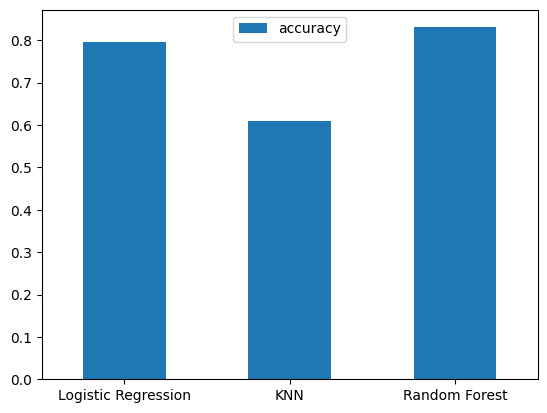

In [215]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

In [216]:

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [217]:
train_scores

[1.0,
 0.7863247863247863,
 0.7564102564102564,
 0.7393162393162394,
 0.7606837606837606,
 0.7478632478632479,
 0.7478632478632479,
 0.7393162393162394,
 0.7393162393162394,
 0.7008547008547008,
 0.7136752136752137,
 0.6923076923076923,
 0.6709401709401709,
 0.6837606837606838,
 0.6709401709401709,
 0.6752136752136753,
 0.6794871794871795,
 0.6666666666666666,
 0.6709401709401709,
 0.6709401709401709]

In [218]:
test_scores

[0.6271186440677966,
 0.576271186440678,
 0.6440677966101694,
 0.6440677966101694,
 0.6101694915254238,
 0.6610169491525424,
 0.6779661016949152,
 0.6440677966101694,
 0.6440677966101694,
 0.6610169491525424,
 0.7288135593220338,
 0.6779661016949152,
 0.6949152542372882,
 0.711864406779661,
 0.711864406779661,
 0.711864406779661,
 0.6949152542372882,
 0.711864406779661,
 0.7288135593220338,
 0.7288135593220338]

Maximum KNN score on the test data: 72.88%


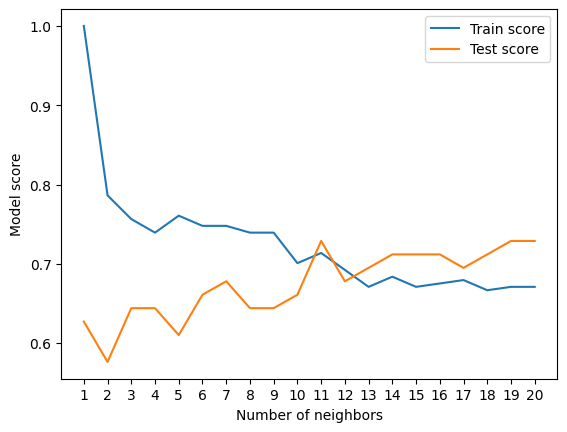

In [219]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [230]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [231]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [232]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [233]:
rs_log_reg.score(X_test, y_test)

0.8135593220338984

In [234]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [235]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [236]:
rs_rf.score(X_test, y_test)

0.8305084745762712

In [237]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [238]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [239]:
gs_log_reg.score(X_test, y_test)

0.8135593220338984

# Evaluation of the machine learning models


In [240]:
y_preds = gs_log_reg.predict(X_test)

In [241]:
y_preds

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int8)

In [242]:
y_test

87     1
268    0
47     1
182    0
148    1
129    1
234    0
122    1
10     1
94     1
152    1
283    0
35     1
289    0
228    0
80     1
48     1
6      1
238    0
251    0
128    1
245    0
287    0
105    1
78     1
279    0
282    0
113    1
63     1
208    0
44     1
59     1
293    0
121    1
62     1
170    0
290    0
117    1
164    1
66     1
151    1
69     1
277    0
163    1
187    0
32     1
24     1
26     1
285    0
123    1
253    0
82     1
19     1
178    0
220    0
183    0
189    0
173    0
7      1
Name: target, dtype: int8

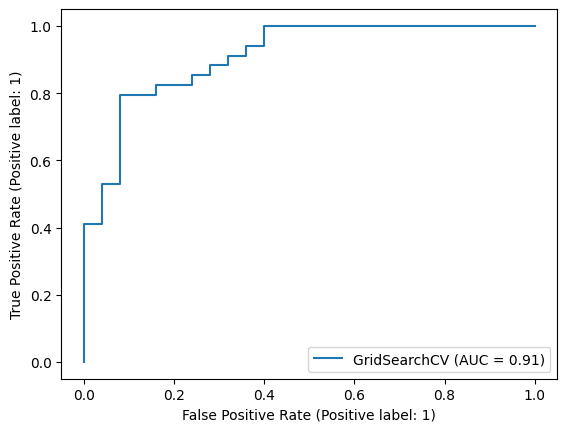

In [246]:
# Plotting ROC curve
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

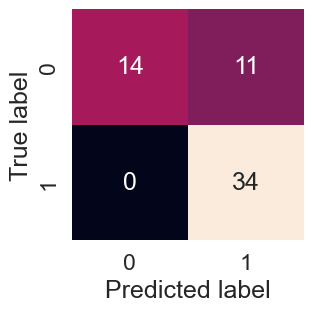

In [247]:
# Using Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
plot_conf_mat(y_test, y_preds)


In [248]:
# Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        25
           1       0.76      1.00      0.86        34

    accuracy                           0.81        59
   macro avg       0.88      0.78      0.79        59
weighted avg       0.86      0.81      0.80        59



#  Cross-Validation

In [249]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [250]:
# Creating new classifier using best params
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")


In [252]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.83050847, 0.89830508, 0.89830508, 0.87931034, 0.74137931])

In [253]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8495616598480421

In [255]:
# Using similar technique for calculating other evaluating metrics
# For cross-validated precision
cv_pcc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_pcc

array([0.78947368, 0.88235294, 0.88235294, 0.85714286, 0.71794872])

In [256]:
cv_pcc = np.mean(cv_pcc)
cv_pcc

0.8258542283310085

In [257]:
# For cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.925

In [258]:
# For cross_validated f1 score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8719158915501148

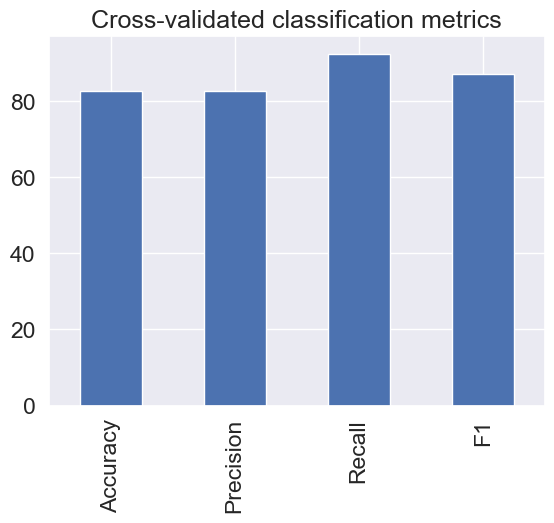

In [263]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc) *100,
                           "Precision": np.mean(cv_pcc)*100,
                           "Recall": np.mean(cv_recall)*100,
                           "F1": np.mean(cv_f1)*100},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

**Summary**

The project involves investigating the heart disease dataset taken from kaggle. The data set is cleaned and EDA is performed. Further classification algorithms such as Logistic Regression, Random Forest and KNeighbors classifier are used for training of the models. The evaluation metrics are calculated. Hyperparameter tuning is done to improve the accuracy of the models. The methods used for tuning include RandomizedSearchCV and GridSearchCV. Further cross-validation is also used for improving the model performance. The ROC curve gives good results with a AUC value of 0.91. The problem can be further investigated using different classification algorithms such as CatBoost or XgBoost.